### <i> Harnessing ML to Analyze Energy Generation and Capacity Trends in the USA A Comprehensive Study </i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/pinuto/global-energy-generation-and-capacity-imf </i>
### <i> Import Library Files </i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### <i> Load The Dataset </i>

In [2]:
data = pd.read_csv("Renewable_Energy.csv")
data

,ObjectId,Country,ISO2,ISO3,Indicator,Technology,Energy_Type,Unit,Source,CTS_Name,...,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,F2023
0,1,Advanced Economies,NaN,AETMP,Electricity Generation,Bioenergy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,250919.577,263542.750,274561.810,281658.673,286653.446,292379.608,294178.354,306827.472,297837.826,NaN
1,2,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Bioenergy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,...,48343.151,50522.206,52940.018,55311.101,58206.997,59946.258,60789.850,59564.440,60934.763,62146.697
2,3,Advanced Economies,NaN,AETMP,Electricity Generation,Fossil fuels,Total Non-Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,5957377.370,5895105.081,5863974.474,5730416.734,5785386.448,5546081.830,5240196.496,5401739.239,5387109.662,NaN
3,4,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Fossil fuels,Total Non-Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,...,1542498.011,1516740.809,1503912.875,1501356.722,1512610.754,1485733.713,1477595.925,1476335.267,1470127.235,1464243.522
4,5,Advanced Economies,NaN,AETMP,Electricity Generation,Hydropower (excl. Pumped Storage),Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,1250083.974,1229010.224,1243652.987,1271436.807,1270052.391,1244244.740,1276615.396,1236759.800,1188216.136,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,2058,Zimbabwe,ZW,ZWE,Electricity Installed Capacity,Fossil fuels,Total Non-Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,...,1200.000,1200.000,1200.000,1200.750,1200.750,1200.750,1200.750,1200.750,1250.750,1850.750
2058,2059,Zimbabwe,ZW,ZWE,Electricity Generation,Hydropower (excl. Pumped Storage),Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,5466.411,5047.208,2692.085,4084.680,5634.960,5508.851,3880.951,6018.371,5974.141,NaN
2059,2060,Zimbabwe,ZW,ZWE,Electricity Installed Capacity,Hydropower (excl. Pumped Storage),Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,...,757.370,772.385,776.135,780.035,1080.035,1080.015,1080.015,1080.015,1080.015,1080.015
2060,2061,Zimbabwe,ZW,ZWE,Electricity Generation,Solar energy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,4.433,4.138,4.706,5.877,12.406,16.907,21.025,56.360,76.005,NaN


### <i> Dataset Overview </i>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             2062 non-null   int64  
 1   Country              2062 non-null   object 
 2   ISO2                 1790 non-null   object 
 3   ISO3                 2062 non-null   object 
 4   Indicator            2062 non-null   object 
 5   Technology           2062 non-null   object 
 6   Energy_Type          2062 non-null   object 
 7   Unit                 2062 non-null   object 
 8   Source               2062 non-null   object 
 9   CTS_Name             2062 non-null   object 
 10  CTS_Code             2062 non-null   object 
 11  CTS_Full_Descriptor  2062 non-null   object 
 12  F2000                1414 non-null   float64
 13  F2001                1444 non-null   float64
 14  F2002                1468 non-null   float64
 15  F2003                1478 non-null   f

In [4]:
data.describe()

,ObjectId,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,...,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,F2023
count,2062.000000,1.414000e+03,1.444000e+03,1.468000e+03,1.478000e+03,1.517000e+03,1.556000e+03,1.579000e+03,1.623000e+03,1.659000e+03,...,1.937000e+03,1.960000e+03,1.988000e+03,2.002000e+03,2.011000e+03,2.024000e+03,2.039000e+03,2.040000e+03,2.038000e+03,1.027000e+03
mean,1031.500000,6.992760e+04,6.871397e+04,7.067329e+04,7.331630e+04,7.458823e+04,7.595276e+04,7.800904e+04,7.986888e+04,8.014079e+04,...,8.426139e+04,8.507305e+04,8.632046e+04,8.848804e+04,9.156091e+04,9.245655e+04,9.278671e+04,9.744524e+04,1.007983e+05,4.976320e+04
std,595.392448,4.836078e+05,4.798462e+05,4.981220e+05,5.215133e+05,5.362688e+05,5.543707e+05,5.729973e+05,5.996930e+05,6.018821e+05,...,6.594045e+05,6.616948e+05,6.677716e+05,6.812902e+05,7.024957e+05,7.006865e+05,6.884456e+05,7.232829e+05,7.328269e+05,2.696103e+05
min,1.000000,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,...,6.000000e-03,3.000000e-03,3.000000e-03,6.000000e-03,6.000000e-03,3.000000e-03,4.000000e-03,1.000000e-03,1.000000e-03,5.000000e-03
25%,516.250000,2.317725e+01,2.122575e+01,2.106400e+01,2.161225e+01,2.000000e+01,1.857500e+01,1.900000e+01,1.623200e+01,1.400000e+01,...,1.342800e+01,1.898275e+01,2.200675e+01,2.702925e+01,3.182750e+01,3.320500e+01,3.456350e+01,4.074900e+01,4.991350e+01,4.105200e+01
50%,1031.500000,3.504405e+02,3.400000e+02,3.535000e+02,3.636475e+02,3.580000e+02,3.249730e+02,3.255000e+02,3.180000e+02,3.075900e+02,...,3.245060e+02,3.302900e+02,3.622840e+02,3.759495e+02,4.240000e+02,4.598875e+02,4.782520e+02,5.370000e+02,5.872100e+02,4.076200e+02
75%,1546.750000,5.220000e+03,5.118967e+03,5.085323e+03,5.353625e+03,5.222000e+03,5.213500e+03,5.456561e+03,5.266000e+03,5.430749e+03,...,5.580000e+03,5.887909e+03,6.176750e+03,6.557209e+03,7.027650e+03,7.254168e+03,8.034965e+03,8.642303e+03,9.203950e+03,5.607220e+03
max,2062.000000,9.957303e+06,1.006956e+07,1.055068e+07,1.113485e+07,1.161265e+07,1.215185e+07,1.266965e+07,1.346609e+07,1.365156e+07,...,1.588286e+07,1.604392e+07,1.626318e+07,1.658757e+07,1.706251e+07,1.700786e+07,1.657402e+07,1.743897e+07,1.759922e+07,4.528065e+06


### <i> Data Visulization And Analsysis </i>

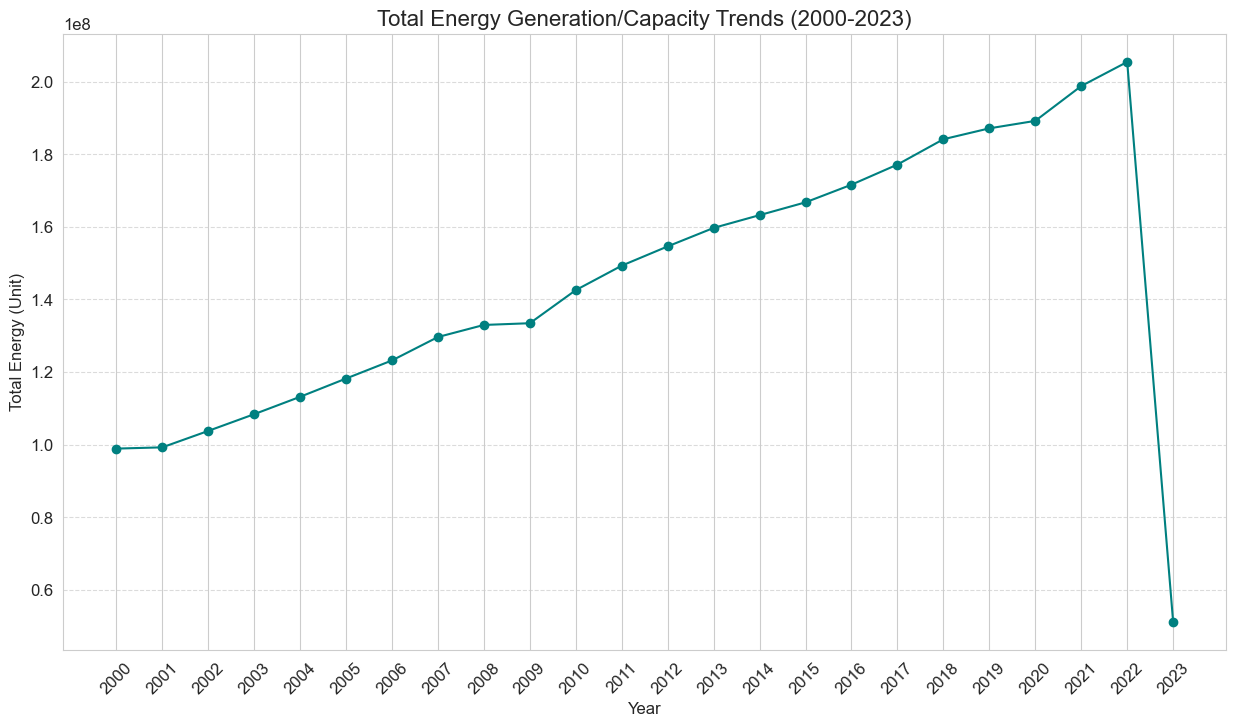

In [5]:
# Setting a consistent visual style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12, 'figure.figsize': (15, 8)})

# 1. Line Plot - Total Energy Trends Over the Years
total_energy = data.loc[:, 'F2000':'F2023'].sum()
years = [int(col[1:]) for col in total_energy.index]
plt.plot(years, total_energy, marker='o', color='teal')
plt.title('Total Energy Generation/Capacity Trends (2000-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Energy (Unit)')
plt.xticks(years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

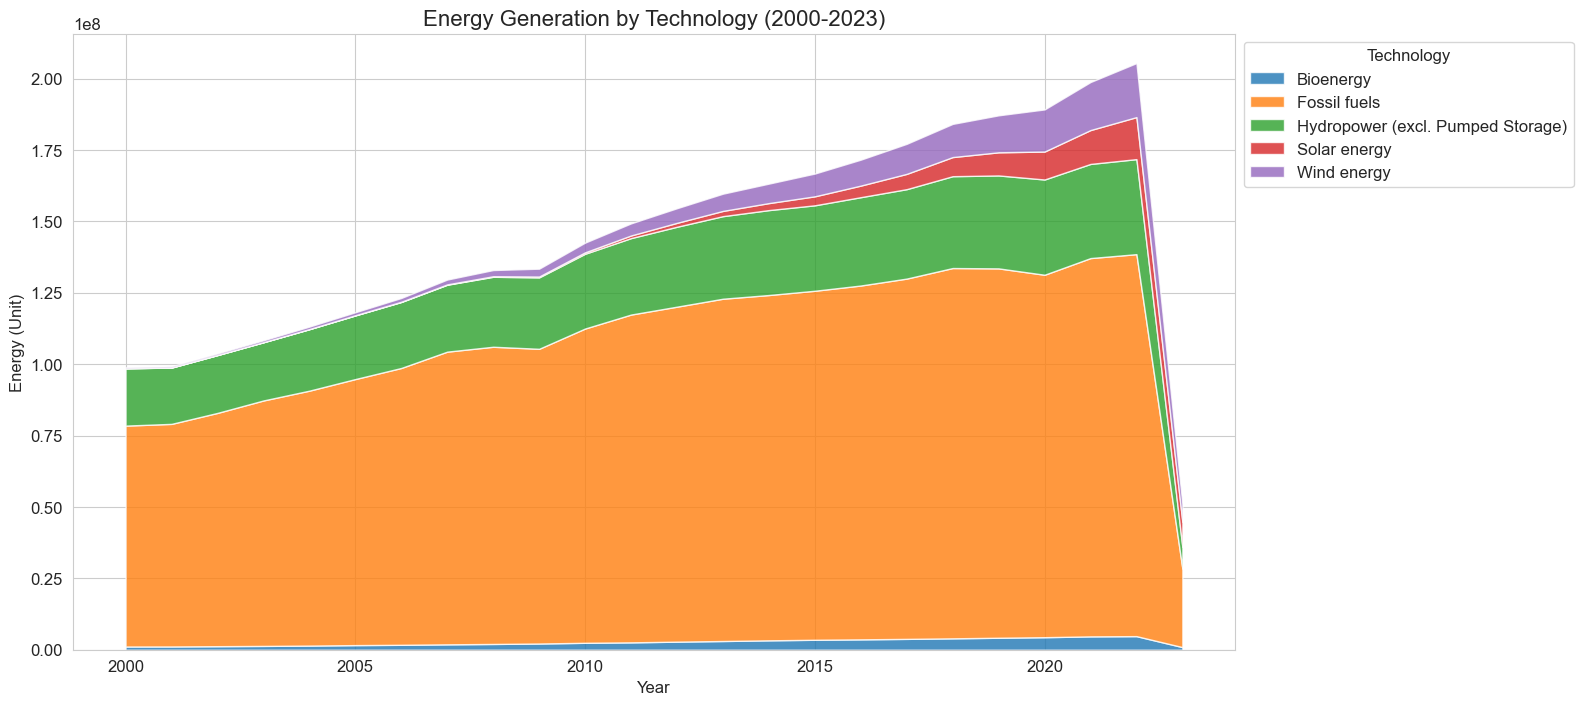

In [6]:
# 2. Stacked Area Chart - Energy Trends by Technology
energy_by_tech = data.groupby('Technology').sum().loc[:, 'F2000':'F2023']
years = [int(col[1:]) for col in energy_by_tech.columns]
plt.stackplot(years, energy_by_tech, labels=energy_by_tech.index, alpha=0.8)
plt.title('Energy Generation by Technology (2000-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Energy (Unit)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Technology')
plt.show()

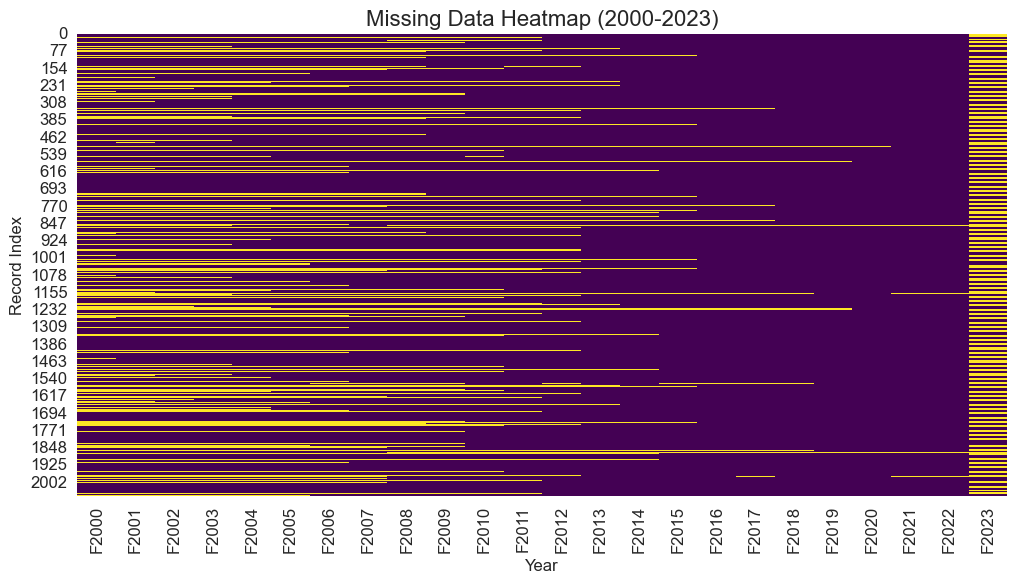

In [7]:
# 3. Heatmap - Missing Data Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(data.loc[:, 'F2000':'F2023'].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (2000-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Record Index')
plt.show()


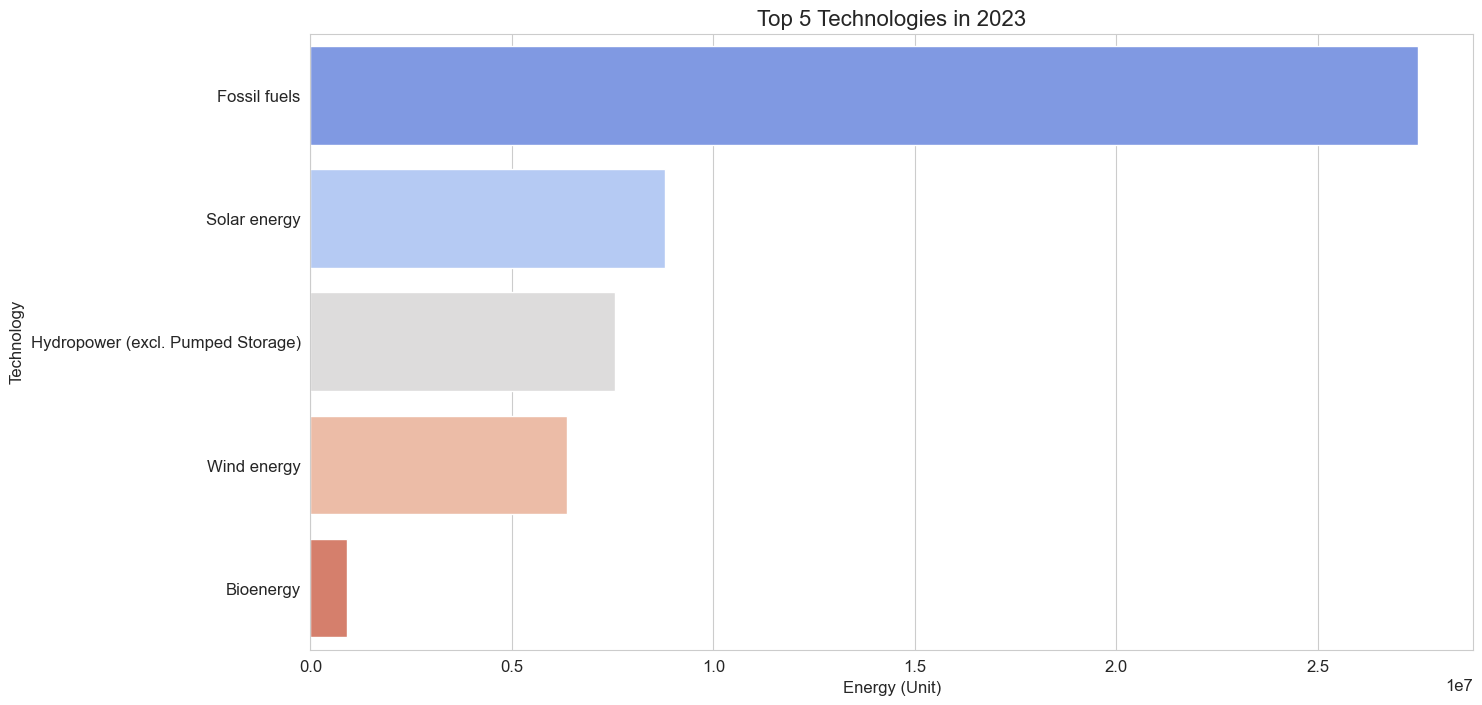

In [8]:
# 4. Bar Plot - Top 5 Technologies in the Most Recent Year
latest_year = 'F2023'
top_5_tech = data.groupby('Technology')[latest_year].sum().nlargest(5)
sns.barplot(x=top_5_tech.values, y=top_5_tech.index, palette='coolwarm')
plt.title(f'Top 5 Technologies in {latest_year[1:]}', fontsize=16)
plt.xlabel('Energy (Unit)')
plt.ylabel('Technology')
plt.show()

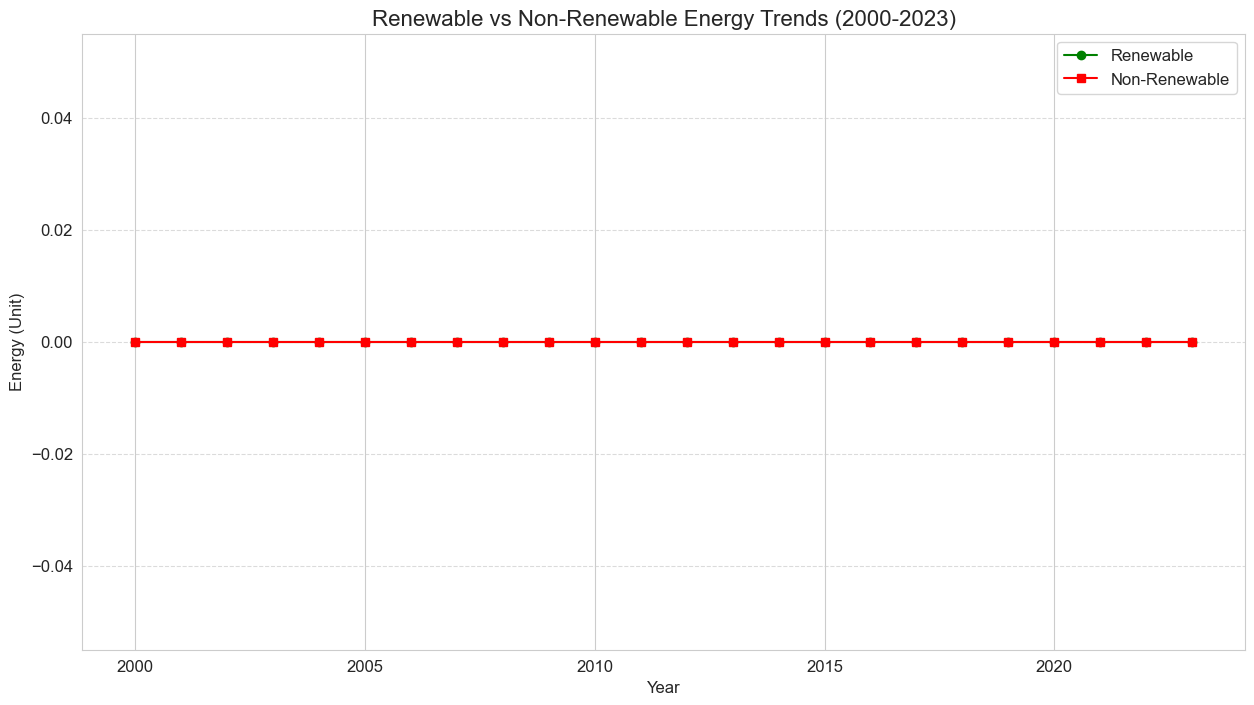

In [9]:
# 5. Line Plot - Renewable vs Non-Renewable Trends
renewable_types = ['Solar', 'Wind', 'Hydro', 'Geothermal']  # Example renewable types
non_renewable_types = ['Coal', 'Gas', 'Oil', 'Nuclear']  # Example non-renewable types

renewable_data = data[data['Energy_Type'].isin(renewable_types)].loc[:, 'F2000':'F2023'].sum()
non_renewable_data = data[data['Energy_Type'].isin(non_renewable_types)].loc[:, 'F2000':'F2023'].sum()

plt.plot(years, renewable_data, marker='o', label='Renewable', color='green')
plt.plot(years, non_renewable_data, marker='s', label='Non-Renewable', color='red')
plt.title('Renewable vs Non-Renewable Energy Trends (2000-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Energy (Unit)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

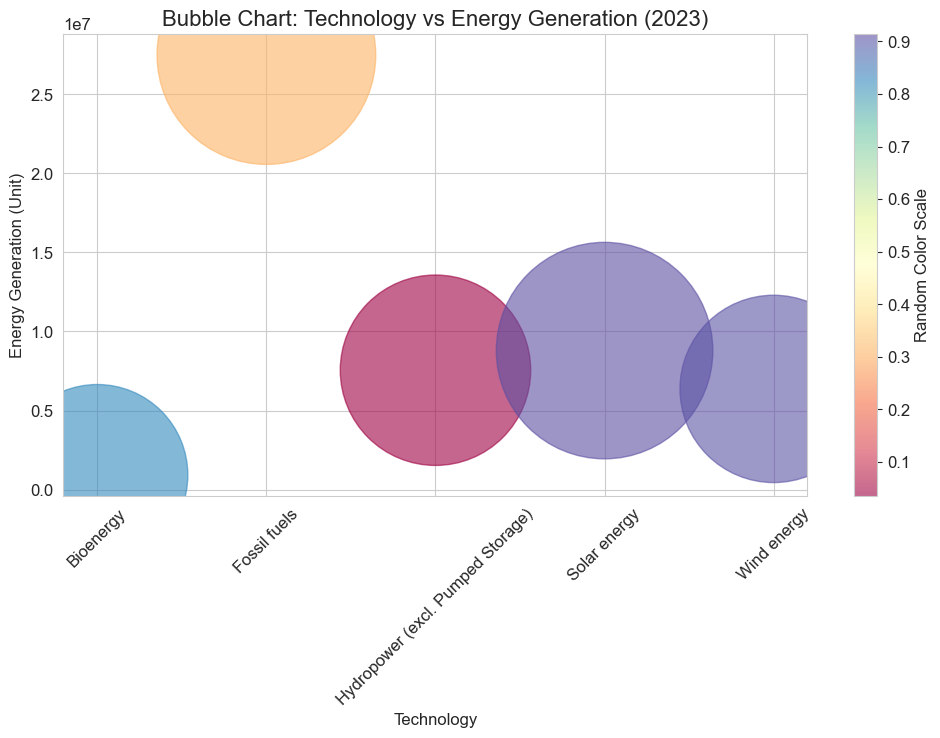

In [10]:
# 6. Bubble Chart - Technology vs Energy Generation (2023)
bubble_data = data.groupby('Technology').agg({'F2023': 'sum', 'Energy_Type': 'count'}).reset_index()
bubble_data.rename(columns={'Energy_Type': 'Count'}, inplace=True)

plt.figure(figsize=(12, 6))
plt.scatter(
    bubble_data['Technology'],
    bubble_data['F2023'],
    s=bubble_data['Count'] * 50,  # Scale size
    alpha=0.6,
    c=np.random.rand(len(bubble_data)),
    cmap='Spectral'
)
plt.title('Bubble Chart: Technology vs Energy Generation (2023)', fontsize=16)
plt.xlabel('Technology')
plt.ylabel('Energy Generation (Unit)')
plt.xticks(rotation=45)
plt.colorbar(label='Random Color Scale')
plt.show()

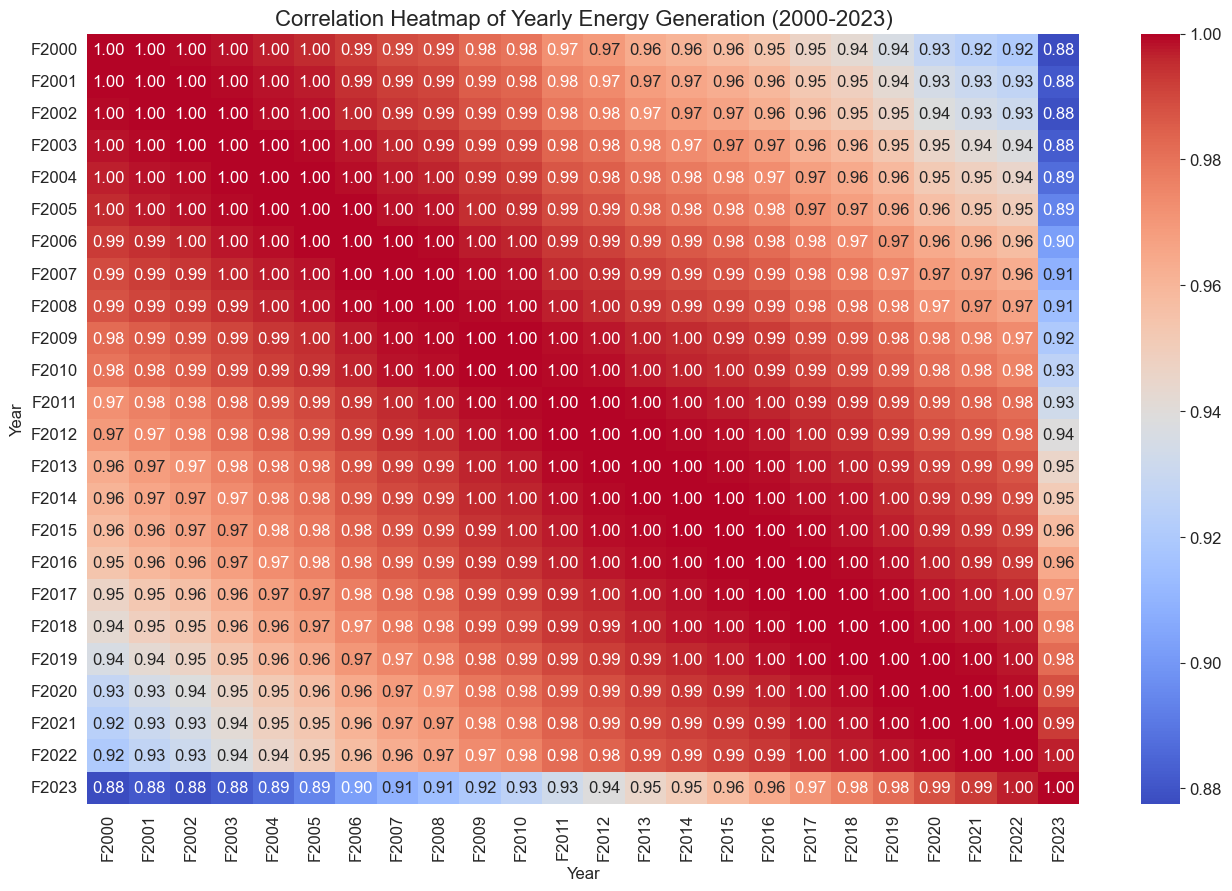

In [11]:
# 1. Heatmap of Yearly Energy Generation Correlations
corr_data = data.loc[:, 'F2000':'F2023'].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Yearly Energy Generation (2000-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Year')
plt.show()

<Figure size 1200x600 with 0 Axes>

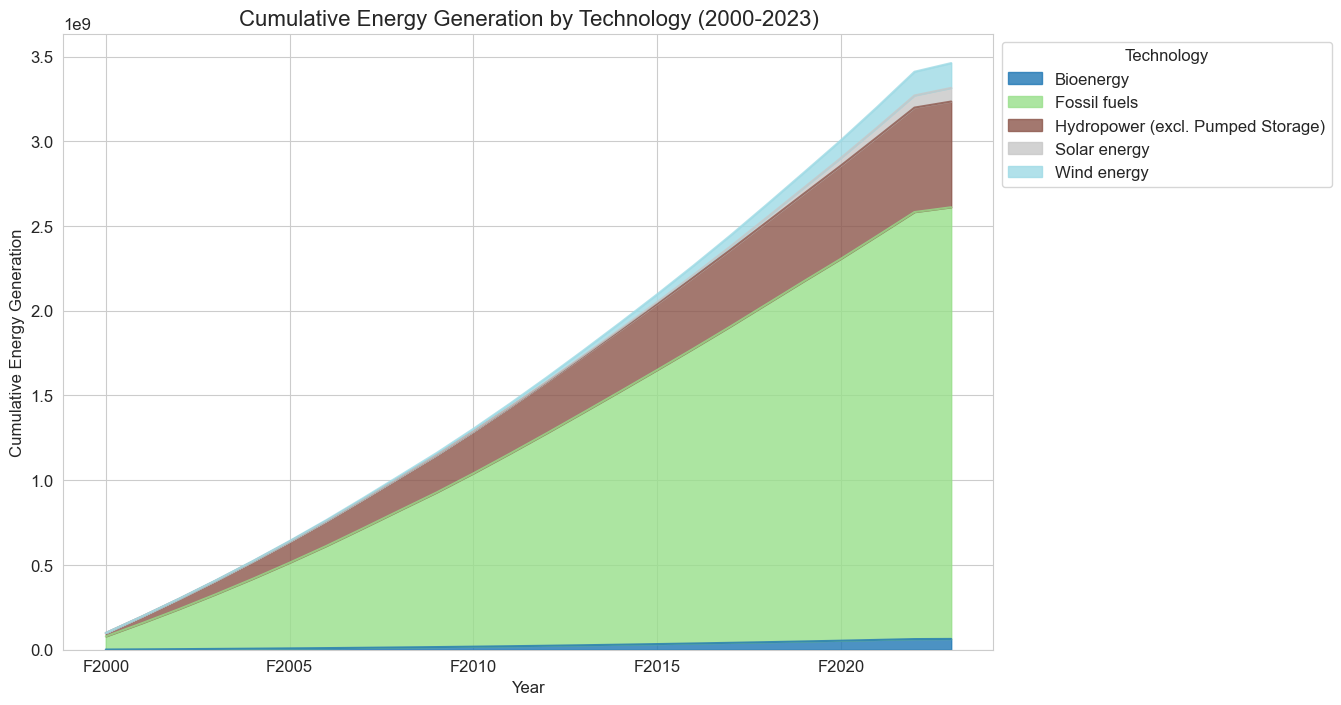

In [12]:
# 4. Stacked Area Plot for Cumulative Energy Generation by Technology
tech_cumsum_data = data.groupby('Technology').sum().loc[:, 'F2000':'F2023']
tech_cumsum_data = tech_cumsum_data.cumsum(axis=1).T

plt.figure(figsize=(12, 6))
tech_cumsum_data.plot(kind='area', stacked=True, colormap='tab20', alpha=0.8, figsize=(12, 8))
plt.title('Cumulative Energy Generation by Technology (2000-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Cumulative Energy Generation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Technology')
plt.show()

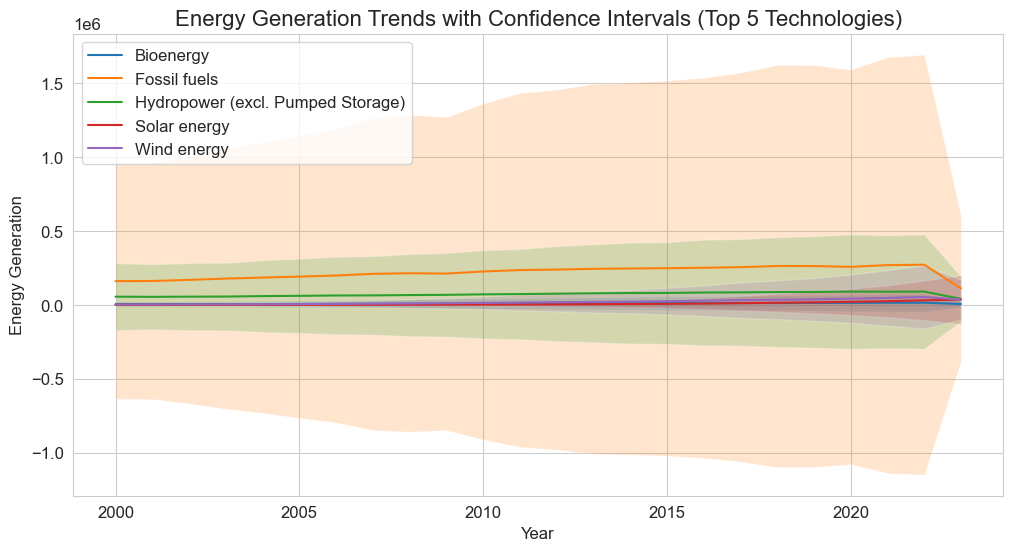

In [13]:
# 7. Line Chart with Confidence Intervals for Energy Generation Trends
import statsmodels.api as sm

plt.figure(figsize=(12, 6))
for tech in data['Technology'].unique()[:5]:  # Focus on top 5 technologies for readability
    tech_data = data[data['Technology'] == tech].loc[:, 'F2000':'F2023'].mean(axis=0)
    tech_data.index = [int(year[1:]) for year in tech_data.index]
    mean = tech_data.values
    std = data[data['Technology'] == tech].loc[:, 'F2000':'F2023'].std(axis=0).values

    plt.plot(tech_data.index, mean, label=tech)
    plt.fill_between(tech_data.index, mean - std, mean + std, alpha=0.2)

plt.title('Energy Generation Trends with Confidence Intervals (Top 5 Technologies)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Energy Generation')
plt.legend(loc='upper left')
plt.show()

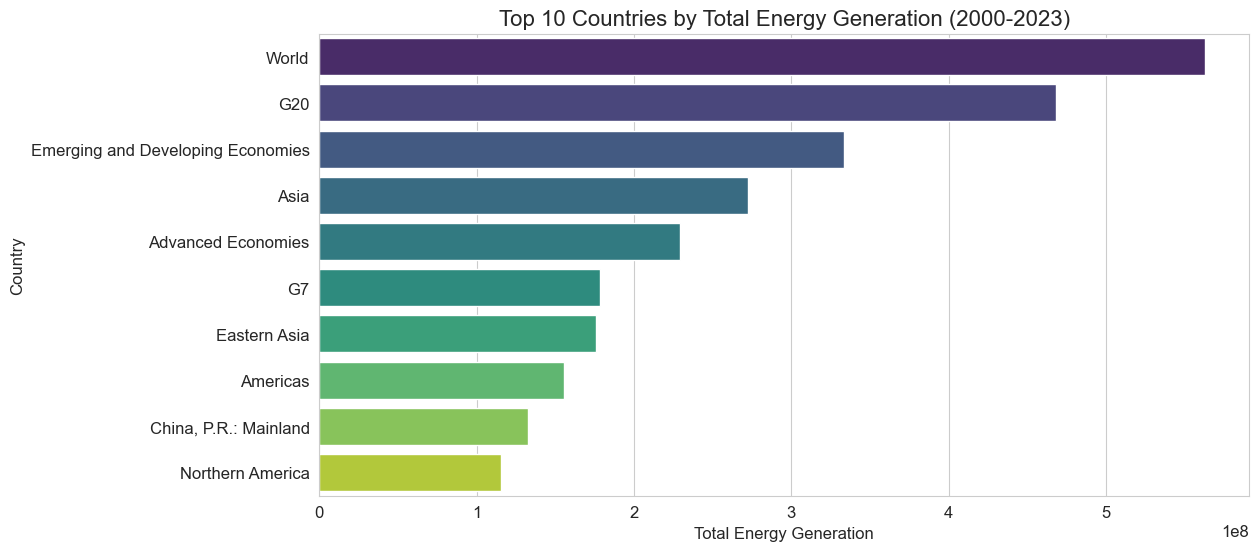

In [14]:
# 1. Top 10 Countries by Total Energy Generation (2000-2023)
country_total_energy = data.groupby('Country').sum().loc[:, 'F2000':'F2023'].sum(axis=1).sort_values(ascending=False)
top_countries = country_total_energy.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Energy Generation (2000-2023)', fontsize=16)
plt.xlabel('Total Energy Generation')
plt.ylabel('Country')
plt.show()

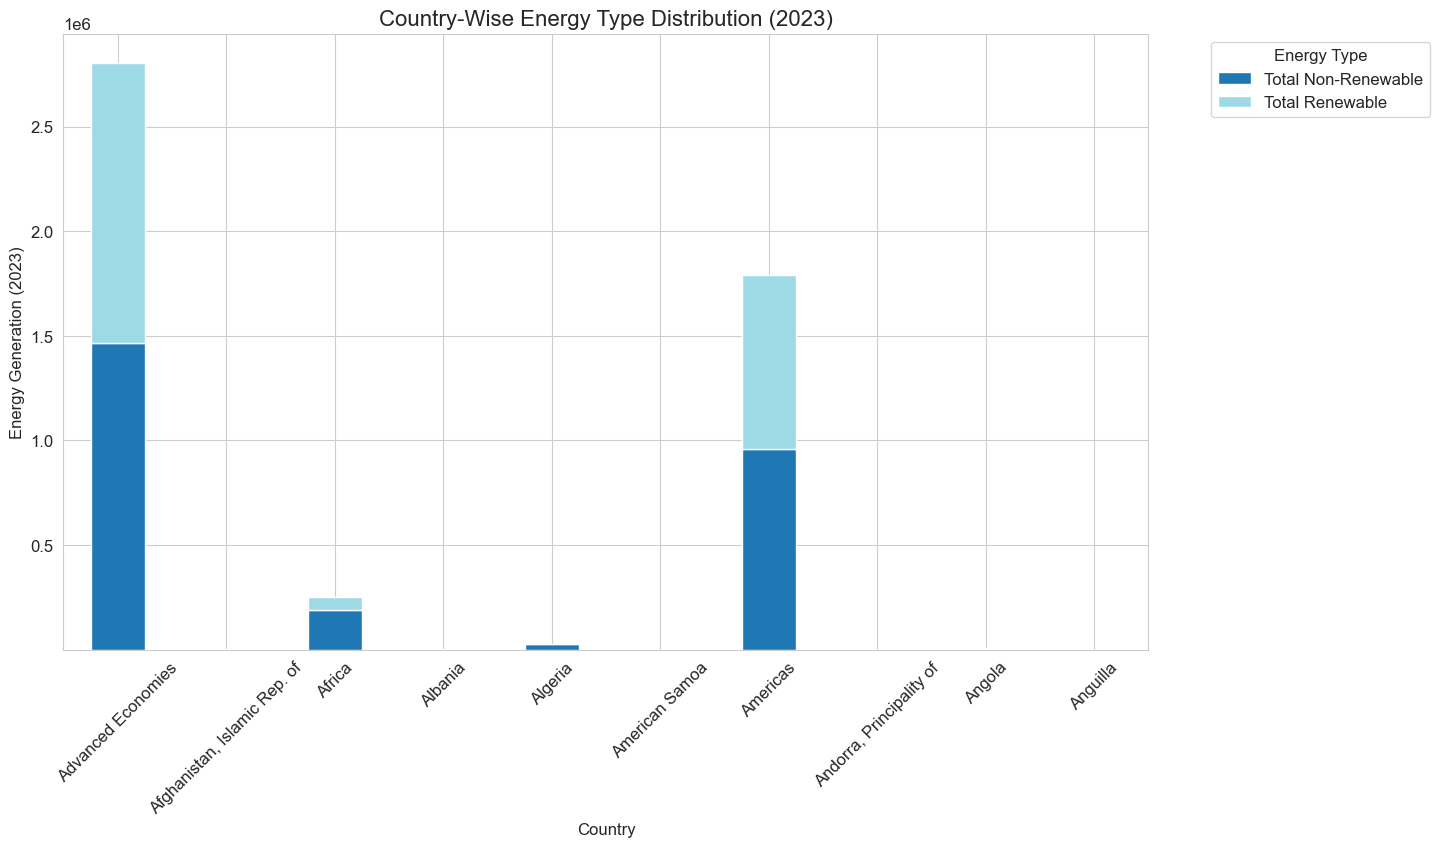

In [15]:
# 2. Country-Wise Energy Type Distribution (2023)
country_energy_type = data.groupby(['Country', 'Energy_Type'])['F2023'].sum().reset_index()
pivot_country_energy = country_energy_type.pivot(index='Country', columns='Energy_Type', values='F2023').fillna(0)

pivot_country_energy.head(10).plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Country-Wise Energy Type Distribution (2023)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Energy Generation (2023)')
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

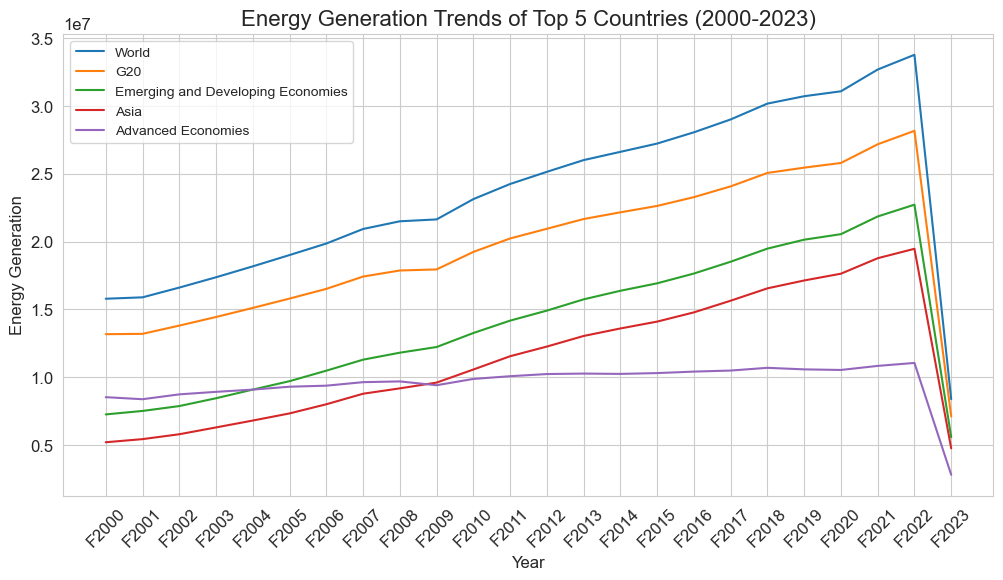

In [16]:
# 3. Country-Wise Energy Generation Trends (2000-2023) - Focus on Top 5 Countries
top_5_countries = country_total_energy.head(5).index
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = data[data['Country'] == country].loc[:, 'F2000':'F2023'].sum()
    plt.plot(country_data.index, country_data.values, label=country)

plt.title('Energy Generation Trends of Top 5 Countries (2000-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Energy Generation')
plt.legend(loc='upper left', fontsize=10)
plt.xticks(rotation=45)
plt.show()

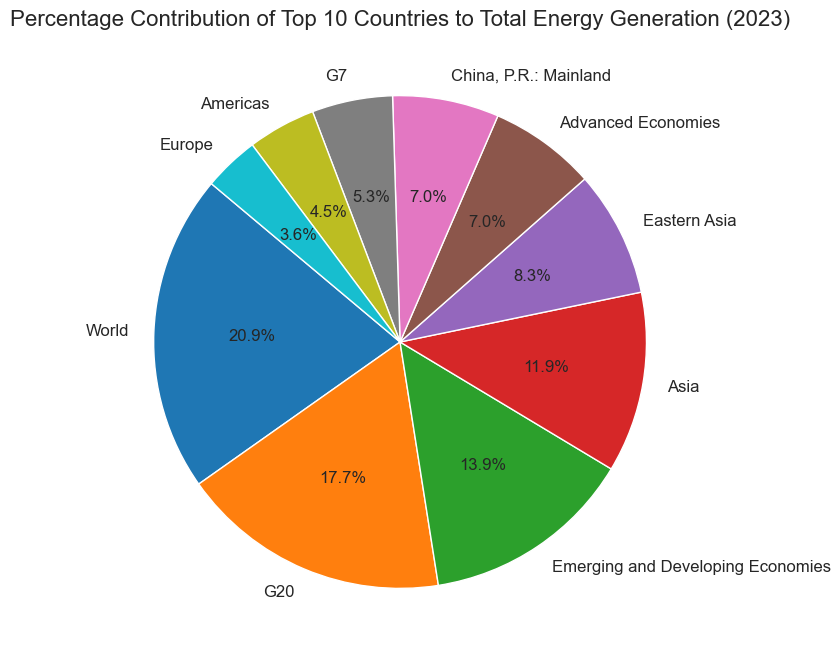

In [17]:
# 4. Percentage Contribution of Countries to Total Energy Generation (2023)
total_2023_energy = data.groupby('Country')['F2023'].sum()
total_2023_energy = total_2023_energy[total_2023_energy > 0]  # Filter out countries with zero energy generation
percentage_contribution = (total_2023_energy / total_2023_energy.sum()) * 100
percentage_contribution = percentage_contribution.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
plt.pie(percentage_contribution, labels=percentage_contribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Percentage Contribution of Top 10 Countries to Total Energy Generation (2023)', fontsize=16)
plt.show()

### <i> Data Preprocessing </i>

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Display initial info about the dataset
print("Initial Dataset Information:")
print(data.info())
print("\nMissing Values Count:")
print(data.isnull().sum())

# 1. Handle Missing Values
# Filling missing numerical values with the median
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Filling missing categorical values with the most frequent value
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

print("\nMissing Values After Imputation:")
print(data.isnull().sum())

# 2. Handle Categorical Variables
# Encode the target column 'Energy_Type' using LabelEncoder
le = LabelEncoder()
data['Energy_Type'] = le.fit_transform(data['Energy_Type'])

# Encode other categorical columns using one-hot encoding
categorical_cols = [col for col in categorical_cols if col != 'Energy_Type']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 3. Feature Scaling
# Identify numerical columns for scaling
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Standardize numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# 4. Train-Test Split
# Separate features and target variable
X = data.drop('Energy_Type', axis=1)
y = data['Energy_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print("\nShapes of Datasets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             2062 non-null   int64  
 1   Country              2062 non-null   object 
 2   ISO2                 1790 non-null   object 
 3   ISO3                 2062 non-null   object 
 4   Indicator            2062 non-null   object 
 5   Technology           2062 non-null   object 
 6   Energy_Type          2062 non-null   object 
 7   Unit                 2062 non-null   object 
 8   Source               2062 non-null   object 
 9   CTS_Name             2062 non-null   object 
 10  CTS_Code             2062 non-null   object 
 11  CTS_Full_Descriptor  2062 non-null   object 
 12  F2000                1414 non-null   float64
 13  F2001                1444 non-null   float64
 14  F2002                1468 non-null   float64
 15  F2003    

### <i> Modeling </i>
### <i> Logistic Regression </i>

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       314

    accuracy                           1.00       413
   macro avg       1.00      1.00      1.00       413
weighted avg       1.00      1.00      1.00       413


Accuracy Score: 1.0


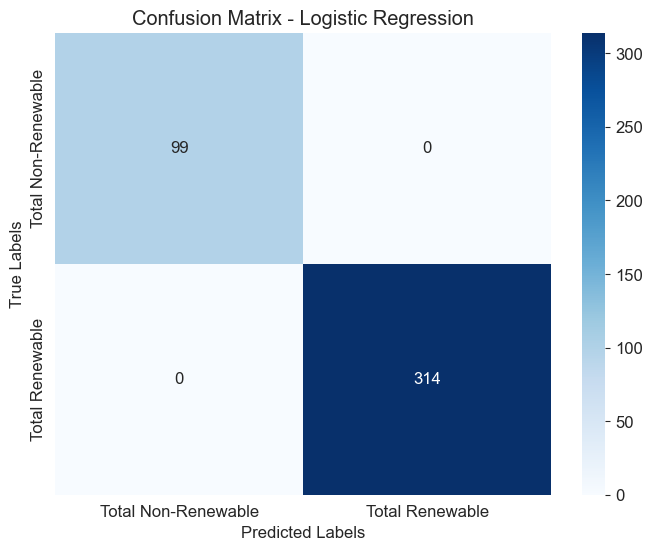

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_logreg))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### <i> Random Forest Classifier </i>

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        99
           1       0.96      1.00      0.98       314

    accuracy                           0.97       413
   macro avg       0.98      0.94      0.96       413
weighted avg       0.97      0.97      0.97       413


Accuracy Score: 0.9709443099273608


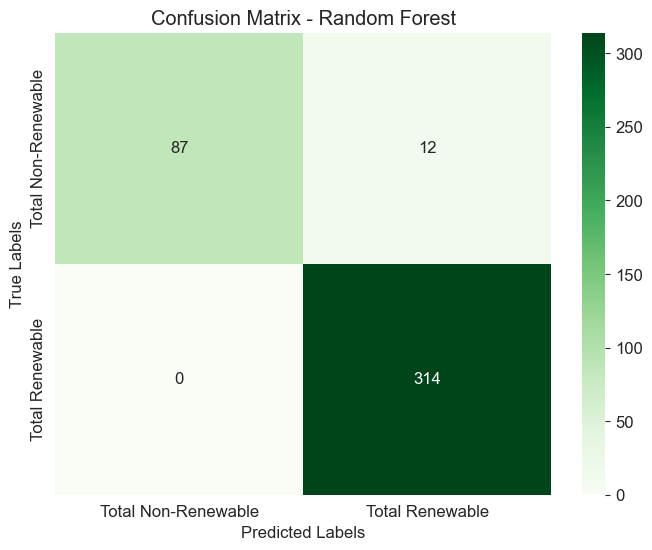

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### <i> SVC </i>

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       1.00      1.00      1.00       314

    accuracy                           1.00       413
   macro avg       1.00      0.99      1.00       413
weighted avg       1.00      1.00      1.00       413


Accuracy Score: 0.9975786924939467


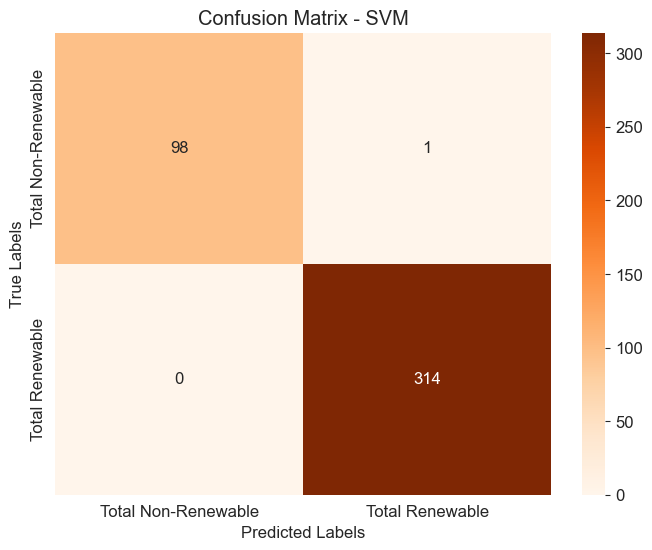

In [21]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### <i> Model Comparisons </i>

Model Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  1.000000   1.000000  1.000000  1.000000
Random Forest        0.970944   0.972014  0.970944  0.970279
SVM                  0.997579   0.997586  0.997579  0.997574


<Figure size 1000x600 with 0 Axes>

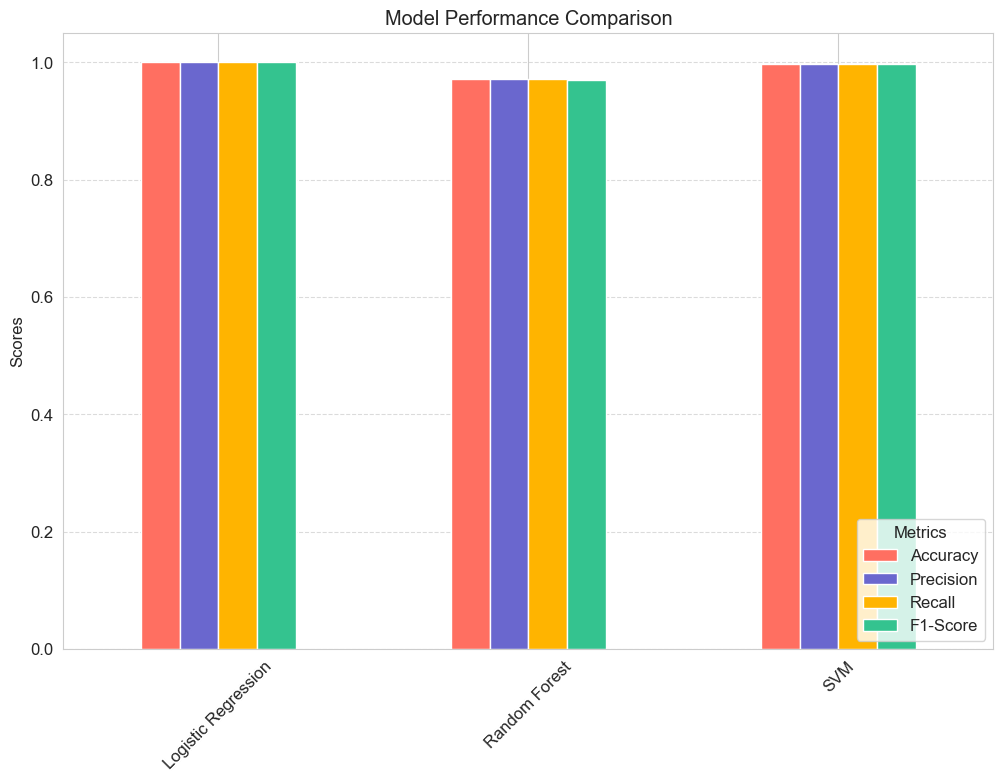

In [22]:
from sklearn.metrics import classification_report, accuracy_score

# Initialize a dictionary to store results
results = {}

# Logistic Regression
log_reg_preds = log_reg.predict(X_test)
log_reg_report = classification_report(y_test, log_reg_preds, output_dict=True)
results['Logistic Regression'] = {
    "Accuracy": accuracy_score(y_test, log_reg_preds),
    "Precision": log_reg_report['weighted avg']['precision'],
    "Recall": log_reg_report['weighted avg']['recall'],
    "F1-Score": log_reg_report['weighted avg']['f1-score']
}

# Random Forest
rf_preds = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_preds, output_dict=True)
results['Random Forest'] = {
    "Accuracy": accuracy_score(y_test, rf_preds),
    "Precision": rf_report['weighted avg']['precision'],
    "Recall": rf_report['weighted avg']['recall'],
    "F1-Score": rf_report['weighted avg']['f1-score']
}

# Support Vector Machine (SVM)
svm_preds = svm_model.predict(X_test)
svm_report = classification_report(y_test, svm_preds, output_dict=True)
results['SVM'] = {
    "Accuracy": accuracy_score(y_test, svm_preds),
    "Precision": svm_report['weighted avg']['precision'],
    "Recall": svm_report['weighted avg']['recall'],
    "F1-Score": svm_report['weighted avg']['f1-score']
}

# Convert results to a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results).T

# Display the comparison
print("Model Comparison:")
print(results_df)

# Plot the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(12, 8), color=["#FF6F61", "#6A67CE", "#FFB400", "#34C38F"])
plt.title("Model Performance Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.legend(loc="lower right", title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
